<a href="https://colab.research.google.com/github/c-mertes/RNAseq-ASHG19/blob/master/colab_notebooks/Getting_Started_with_Colab_and_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of content

* [R Notebooks in Google Colab](#rnote-colab)
  * [Enable editing by making a copy](#make-copy)
  * [Code cells and execution](#code-cell)
  * [Text cells](#text-cell)
  * [Addin and moving cells](#adding-cells)
* [Setup R environment](#setup-r)
* [OUTRIDER example](#outrider-example)
* [Exercise](#Exercise)

# R Notebooks in Google Colab <a name="rnote-colab"></a>

We will use IR notebooks throughout this workshop to run code and visualize results. IR notebooks are similar to IPython notebooks. It combines documentation with code in a single document. If you know already how to use notebooks please skip to the [OUTRIDER example](#outrider-example). Since we will extensively use R/Bioconductor packages it is helpful but not needed to have some basic knowledge of programming in R. To get started with R have a look here 

A notebook is a list of cells. Cells contain either explanatory text (text cells) or executable code (code cells) and its output. Click a cell to select/edit it.

The notebook and code is run on a virtual maschine hosted by Google.

For more details on how to use Google Colab and IPython notebooks please refer to the [Colab docs](https://colab.research.google.com/notebooks/welcome.ipynb) and the [IPyhton notebook docs](https://jupyter.org/).

## Enable editing by making a copy <a name="make-copy"></a>

To enable **editing** of the notebook please make a copy of it and place it into your google drive. Please click on: `"File" -> "Save a copy in Drive"`. Allow access to your google drive if requested. 

## Code cells <a name="code-cell"></a>

Below is a **code cell**. Once the toolbar button indicates CONNECTED on the right top, click in the cell to select it and execute the contents in the following ways:

* Click the **Play icon** in the left gutter of the cell;
* Type **Cmd/Ctrl+Enter** to run the cell in place;
* Type **Shift+Enter** to run the cell and move focus to the next cell (adding one if none exists); or
* Type **Alt+Enter** to run the cell and insert a new code cell immediately below it.

There are additional options for running some or all cells in the **Runtime menu**.

In [1]:
12
a = 10 + 5
a

[1] 12

[1] 15

## Text cells <a name="text-cell"></a>
This is a **text cell**. You can **double-click** to edit this cell. Text cells
use markdown syntax. To learn more, see our [markdown
guide](/notebooks/markdown_guide.ipynb).

You can also add math to text cells using [LaTeX](http://www.latex-project.org/)
to be rendered by [MathJax](https://www.mathjax.org). Just place the statement
within a pair of **\$** signs. For example `$\sqrt{3x-1}+(1+x)^2$` becomes
$\sqrt{3x-1}+(1+x)^2.$

## Adding and moving cells <a name="adding-cells"></a>

You can add new cells by using the **+ CODE** and **+ TEXT** buttons that show when you hover between cells. These buttons are also in the toolbar above the notebook where they can be used to add a cell below the currently selected cell.

You can move a cell by selecting it and clicking **Cell Up** or **Cell Down** in the top toolbar.

## Navigation bar

If you click on the left top corner on the arrow a navigation bar will open. The navigation bar contains the table of content and links the sections. Additionally under the `Files` tab one can browse all files in the virtual machine as well as up- and download files. Mounting of the google drive is only available in a python notebook right now.

# Setup R environment <a name="setup-r"></a>

Since installing and compiling all necessary R packages can take a while, we precompiled them. By downloading our [`r-env-setup-script.R`](https://github.com/c-mertes/RNAseq-ASHG19/blob/master/r-env-setup-script.R) and running it, you setup and configure the virtual maschine for the workshop.

Please run this command **before any analysis** and **each time you start a new session**!

In [7]:
download.file("https://raw.githubusercontent.com/c-mertes/RNAseq-ASHG19/master/r-env-setup-script.R", "r-env-setup-script.R")
source("r-env-setup-script.R")

Update and install needed Ubuntu packages
Download R package cache
Unzipping R package cache
Retrieve data for tutorials


# OUTRIDER example <a name="outrider-example"></a>

This is the quick guide from the vignette of [`OUTRTIDER`](http://bioconductor.org/packages/release/bioc/html/OUTRIDER.html). For the full guide of `OUTRIDER` please have a look at the [vignette](http://bioconductor.org/packages/release/bioc/vignettes/OUTRIDER/inst/doc/OUTRIDER.pdf).

First we have to install `OUTRIDER` if not done already.

In [0]:
if(!requireNamespace("BiocManager", quietly=TRUE))
    install.packages("BiocManager")
if(!requireNamespace("OUTRIDER", quietly=TRUE))
    BiocManager::install("OUTRIDER", Ncpus=10)

Now we can run the example from the OUTRIDER vignette

In [0]:
# load package
library(OUTRIDER)

Loading required package: BiocParallel
Loading required package: GenomicFeatures
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min

Loading required package: S4Vecto

In [0]:
# load raw count and sample data
ctsFile <- system.file('extdata', 'KremerNBaderSmall.tsv', package='OUTRIDER')
ctsTable <- read.table(ctsFile, check.names=FALSE)
ods <- OutriderDataSet(countData=ctsTable)

The `ods` object contains now all information needed for the analysis.

In [11]:
ods

class: OutriderDataSet
class: RangedSummarizedExperiment 
dim: 999 119 
metadata(1): version
assays(1): counts
rownames(999): DDX11L1 OR4F5 ... GORAB PRRX1
rowData names(0):
colnames(119): 65937 66623 ... MUC1412 MUC1436
colData names(1): sampleID

Before we start the analysis, we should cleanup the data first.

In [12]:
# filter out non expressed genes
ods <- filterExpression(ods, minCounts=TRUE, filterGenes=TRUE)

229 genes did not passed the filter due to zero counts. This is 22.9% of the genes.


Now we can fit our autoencoder model and compute p-values

In [13]:
# run full OUTRIDER pipeline (control, fit model, calculate P-values)
ods <- OUTRIDER(ods)

Tue Sep 17 16:10:56 2019: SizeFactor estimation ...
Tue Sep 17 16:10:56 2019: Controlling for confounders ...
Using estimated q with: 23
Tue Sep 17 16:10:56 2019: Using the autoencoder implementation for controlling.


[1] "Initial PCA loss: 4.73997327486604"
[1] "Tue Sep 17 16:11:05 2019: Iteration: 1 loss: 4.19420176347389"
[1] "Tue Sep 17 16:11:11 2019: Iteration: 2 loss: 4.17541637937258"
[1] "Tue Sep 17 16:11:17 2019: Iteration: 3 loss: 4.16668083154231"
[1] "Tue Sep 17 16:11:21 2019: Iteration: 4 loss: 4.16168475878948"
[1] "Tue Sep 17 16:11:26 2019: Iteration: 5 loss: 4.15818241183266"
[1] "Tue Sep 17 16:11:30 2019: Iteration: 6 loss: 4.15517708197128"
[1] "Tue Sep 17 16:11:33 2019: Iteration: 7 loss: 4.15376155696813"
[1] "Tue Sep 17 16:11:36 2019: Iteration: 8 loss: 4.15212109677942"
[1] "Tue Sep 17 16:11:38 2019: Iteration: 9 loss: 4.1514124667338"
[1] "Tue Sep 17 16:11:41 2019: Iteration: 10 loss: 4.15014386823515"
[1] "Tue Sep 17 16:11:45 2019: Iteration: 11 loss: 4.14903657396566"
[1] "Tue Sep 17 16:11:46 2019: Iteration: 12 loss: 4.1489255483735"
[1] "Tue Sep 17 16:11:49 2019: Iteration: 13 loss: 4.14840298639519"
[1] "Tue Sep 17 16:11:52 2019: Iteration: 14 loss: 4.14758741749373"
[1] 

Tue Sep 17 16:11:54 2019: Used the autoencoder implementation for controlling.
Tue Sep 17 16:11:54 2019: P-value calculation ...
Tue Sep 17 16:11:54 2019: Zscore calculation ...


Lets have now a look at the results. They can be retrived by running `results()`.

In [15]:
# results (only significant)
res <- results(ods)
head(res)

geneID,sampleID,pValue,padjust,zScore,l2fc,rawcounts,normcounts,meanCorrected,theta,aberrant,AberrantBySample,AberrantByGene,padj_rank
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>
ATAD3C,MUC1360,2.675153e-11,1.488101e-07,5.27,1.87,948,427.16,140.42,16.57,TRUE,1,1,1
NBPF15,MUC1351,8.074783e-10,4.491741e-06,5.75,0.77,7591,7076.37,4366.88,111.74,TRUE,2,1,1
MSTO1,MUC1367,3.622801e-09,2.015247e-05,-6.24,-0.81,761,855.71,1474.27,152.99,TRUE,1,1,1
HDAC1,MUC1350,2.106800e-08,1.171944e-04,-5.87,-0.77,2215,2415.29,3992.99,136.63,TRUE,1,1,1
DCAF6,MUC1374,7.504589e-08,4.174560e-04,-5.67,-0.62,2348,2967.15,4497.43,195.42,TRUE,1,1,1
NBPF16,MUC1351,2.724963e-07,7.579044e-04,4.81,0.67,4014,3771.55,2478.55,107.39,TRUE,2,1,2


We can also look into more details on a specific gene or sample 

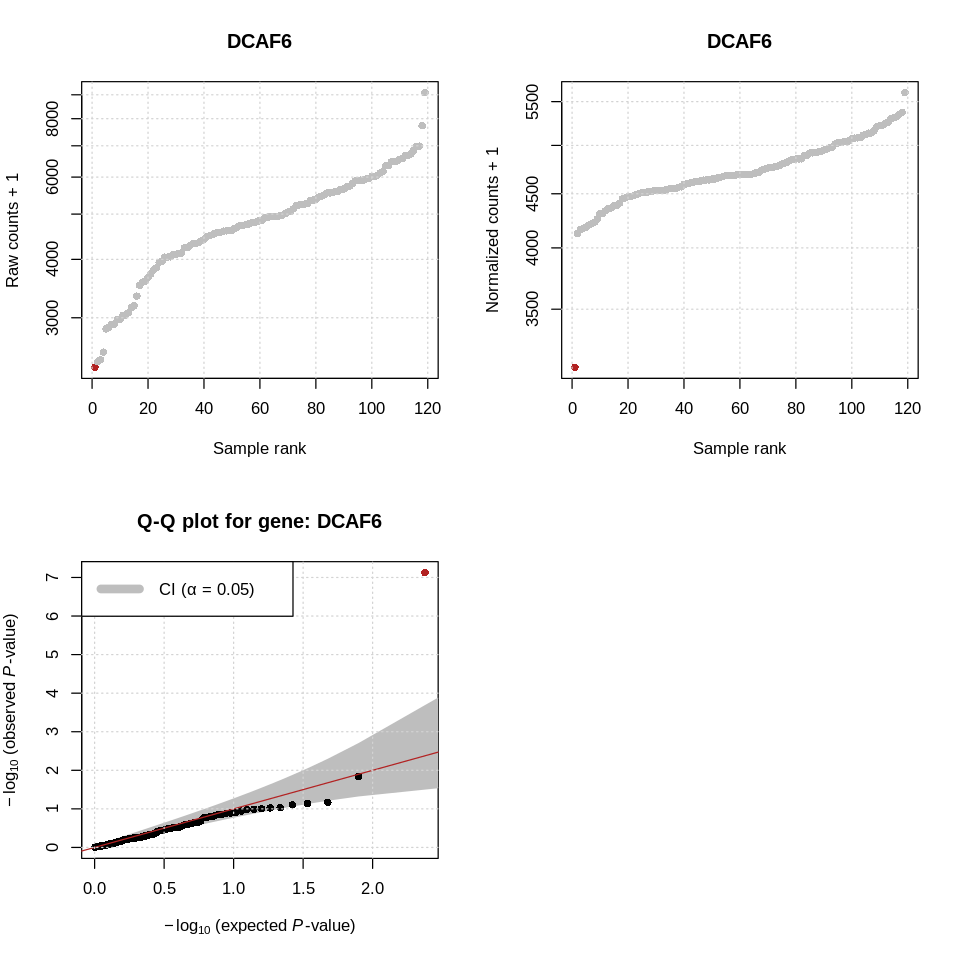

In [38]:
# Options to define plots size
options(repr.plot.width=8, repr.plot.height=8)
par(mfrow=c(2,2))

# example gene expression plot across samples
plotExpressionRank(ods, res[5, geneID], normalize=FALSE, base=TRUE)
plotExpressionRank(ods, res[5, geneID], normalize=TRUE, base=TRUE)
# TODO add observed vs prediction plot after updating OUTRIDER at bioconductor

# a quantile-quantile plot to check if the modeling worked
plotQQ(ods, res[5, geneID])

# Exercise <a name="Exercise"></a>

If you want to check if you got the IPython notebook idea and a bit of R programming, you can start now your own analysis by editing this notebook.

We give you 3 tasks you should be able to manage:

1. Add a new code cell and plot a volcano plot (function: plotVolcano) for sample `MUC1350` with parameter `base=TRUE`
1. Write a comment (text cell) that you will now display the gene names found significant in the analysis
1. Print the gene names (column: geneID) from the results table (object: res) and furthermore print the number of genes in total in `res` (function: nrow)


In [0]:
# Options to define plots size
options(repr.plot.width=4, repr.plot.height=4)

# have fun coding here
